## > CLUSTER ANALYSIS

## IMPORTING THE NECESSARY LIBRARY

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(r"C:\\Users\\Roopa Mohan\\Downloads")
telco = pd.read_csv("Telco.csv")

In [8]:
telco.head()

,Calls,Intern,Text,Data,Age
0,1.12,0.19,23.92,0.18,60
1,1.08,0.22,17.76,0.23,54
2,3.54,0.26,289.79,1.99,34
3,1.09,0.21,19.15,0.21,61
4,1.04,0.24,20.33,0.20,56


## SCALING THE DATA

In [9]:
telco_scaled = telco.apply(lambda x: (x-np.mean(x)/np.std(x)))
#indstead of def we have used lambda
#(apply) helps in function for all the columns

In [10]:
telco_scaled.head()

,Calls,Intern,Text,Data,Age
0,-0.615006,-0.882758,22.867093,-1.250188,57.666306
1,-0.655006,-0.852758,16.707093,-1.200188,51.666306
2,1.804994,-0.812758,288.737093,0.559812,31.666306
3,-0.645006,-0.862758,18.097093,-1.220188,58.666306
4,-0.695006,-0.832758,19.277093,-1.230188,53.666306


## PLOTTING A DENDROGRAM

In [14]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
Z = linkage(telco_scaled, 'complete')

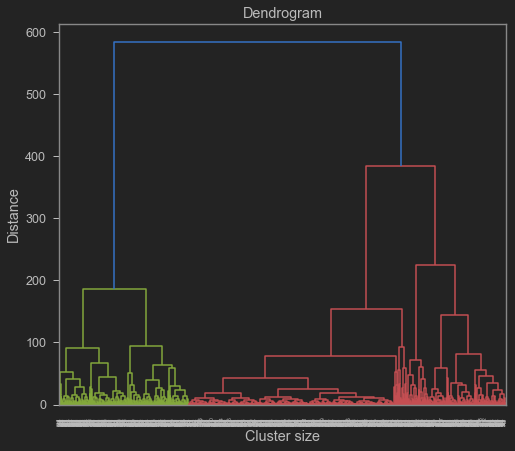

In [38]:
dendrogram(Z, leaf_rotation=90, leaf_font_size=5.)
plt.title("Dendrogram")
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.show()

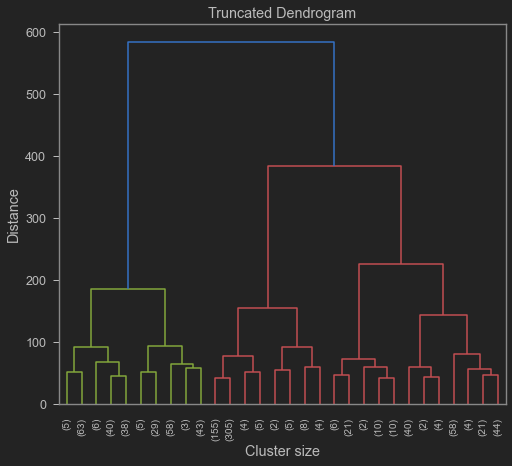

In [35]:
dendrogram (Z, truncate_mode ='lastp',p=30,leaf_rotation=90, leaf_font_size=10.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.show()

##  AGGLOMERATIVE HIERARCHICAL CLUSTERING

In [39]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [45]:
hClust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [47]:
hClust.fit(telco_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

## CHECKING THE AGGREGATE OF THE GROUPS

In [48]:
telco["Groups"]=hClust.labels_

In [49]:
telco.head(10)

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,0
1,1.08,0.22,17.76,0.23,54,0
2,3.54,0.26,289.79,1.99,34,1
3,1.09,0.21,19.15,0.21,61,0
4,1.04,0.24,20.33,0.20,56,0
5,5.59,0.88,19.23,2.02,41,0
6,1.19,0.19,17.94,0.24,71,0
7,3.07,0.34,359.49,2.06,30,1
8,5.34,0.99,295.47,0.97,41,1
9,2.43,0.09,17.57,0.46,33,0


In [50]:
telco.groupby(["Groups"]).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,2.869262,0.508340,25.077828,1.028094,49.293033
1,3.182312,0.367225,314.120751,2.057283,32.277457
2,1.965072,0.173696,464.425580,3.446594,21.608696
3,2.459592,0.901020,212.618163,1.892653,38.877551
4,1.891382,0.165263,552.182105,3.544474,21.381579
